<hr/>

 **Traffic Volume Prediction** ( Artificial Neural Network)

<hr/>

### Table of Contents
1. [Overview](#ch1)
1. [Dataset](#ch2)
1. [Exploratory Data Analysis](#ch3)
1. [Working with Feature Data](#ch4)
1. [Feature Engineering](#ch5)
1. [Scaling and Train Test Split](#ch6)
1. [Creating a Model](#ch7)
1. [Training the Model](#ch8)
1. [Evaluation on Test Data](#ch9)
1. [Predicting the traffic volume](#ch10)

<a id="ch1"></a>
## Overview 
<hr/>

One of the objectives of this notebook is to **show step-by-step how analyzing the dataset to predict future home prices.** Moreover, we are going to explain most of the concepts used so that you understand why we are using them.






The following questions will be answered throughout the Kernel:
* ***Which features are available in the dataset?***
* ***Which features are categorical?***
* ***Which features are numerical?***
* ***Which features contain blank, null or empty values?***
* ***What are the data types for various features?***
* ***What is the distribution of numerical feature values across the samples?***
* ***Which features are more correlated to the price?***

<a id="ch2"></a>
## Dataset
<hr/>

**Traffic Volume Prediction**
Give some attributes we have to predict the traffic volume.

There are 9 attributes which represents the following -

date_time - DateTime Hour of the data collected in local CST time




* holiday - Categorical US National holidays plus regional 
* holiday, Minnesota State Fair
* temp - Numeric Average temp in kelvin
* rain_1h - Numeric Amount in mm of rain that occurred in the hour
* snow_1h - Numeric Amount in mm of snow that occurred in the hour
* clouds_all - Numeric Percentage of cloud cover
* weather_main - Categorical Short textual description of the current weather
* weather_description - Categorical Longer textual description of the current weather
* traffic_volume - Numeric Hourly I-94 ATR 301 reported westbound 
traffic volume (Target)








In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn import tree
from sklearn import svm
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

### Acquire data
The Python Pandas packages helps us work with our datasets. We start by acquiring the datasets into Pandas DataFrames

In [94]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Load Data**

In [95]:
test_set = pd.read_csv("/content/drive/MyDrive/Internship/Test.csv")
train_set = pd.read_csv("/content/drive/MyDrive/Internship/Train.csv")

In [96]:
train_set.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,2012-10-02 09:00:00,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [97]:
train_set.shape

(33750, 15)

### Analyze by describing data
Pandas also helps describe the datasets answering following questions early in our project.

***Which features are available in the dataset?***

In [98]:
print(train_set.columns.values)

['date_time' 'is_holiday' 'air_pollution_index' 'humidity' 'wind_speed'
 'wind_direction' 'visibility_in_miles' 'dew_point' 'temperature'
 'rain_p_h' 'snow_p_h' 'clouds_all' 'weather_type' 'weather_description'
 'traffic_volume']


***Which features are categorical?***

These values classify the samples into sets of similar samples. Within categorical features are the values nominal, ordinal, ratio, or interval based? Among other things this helps us select the appropriate plots for visualization.

* Categorical: is_holiday,'weather_type', 'weather_description'

***Which features are numerical?***

Which features are numerical? These values change from sample to sample. Within numerical features are the values discrete, continuous, or timeseries based? Among other things this helps us select the appropriate plots for visualization.

* numerical:'date_time'  'air_pollution_index' 'humidity' 'wind_speed'
 'wind_direction' 'visibility_in_miles' 'dew_point' 'temperature'
 'rain_p_h' 'snow_p_h' 'clouds_all' 'traffic_volume'

In [99]:
train_set.tail()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
33745,2017-05-17 21:00:00,None,74,85,1,328,7,7,287.88,0.0,0.0,90,Mist,mist,2348
33746,2017-05-17 22:00:00,None,81,70,1,24,2,2,286.95,0.0,0.0,90,Rain,heavy intensity rain,2194
33747,2017-05-17 22:00:00,None,138,70,1,24,1,1,286.95,0.0,0.0,90,Mist,mist,2194
33748,2017-05-17 23:00:00,None,229,66,1,42,6,6,285.75,0.0,0.0,90,Rain,heavy intensity rain,1328
33749,2017-05-17 23:00:00,None,140,63,1,27,8,8,285.75,0.0,0.0,90,Mist,mist,1328


***Which features contain blank, null or empty values?***

We can check for missing values with pandas isnull(). This indicates whether values are missing or not. Then we can sum all the values to check every column. 

In [100]:
train_set.isnull().sum()

date_time              0
is_holiday             0
air_pollution_index    0
humidity               0
wind_speed             0
wind_direction         0
visibility_in_miles    0
dew_point              0
temperature            0
rain_p_h               0
snow_p_h               0
clouds_all             0
weather_type           0
weather_description    0
traffic_volume         0
dtype: int64

***What are the data types for various features?***

Three features are floats, eight are integers and four objects.

In [101]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33750 entries, 0 to 33749
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date_time            33750 non-null  object 
 1   is_holiday           33750 non-null  object 
 2   air_pollution_index  33750 non-null  int64  
 3   humidity             33750 non-null  int64  
 4   wind_speed           33750 non-null  int64  
 5   wind_direction       33750 non-null  int64  
 6   visibility_in_miles  33750 non-null  int64  
 7   dew_point            33750 non-null  int64  
 8   temperature          33750 non-null  float64
 9   rain_p_h             33750 non-null  float64
 10  snow_p_h             33750 non-null  float64
 11  clouds_all           33750 non-null  int64  
 12  weather_type         33750 non-null  object 
 13  weather_description  33750 non-null  object 
 14  traffic_volume       33750 non-null  int64  
dtypes: float64(3), int64(8), object(4)
m

***What is the distribution of numerical feature values across the samples?***

In [102]:
train_set.describe()

,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,traffic_volume
count,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000,33750.000000
mean,154.841422,71.209007,3.378193,199.471852,4.989748,4.989748,280.069587,0.448739,0.000318,50.458785,3240.118163
std,83.735515,16.852248,2.055792,99.841088,2.570021,2.570021,13.415256,53.526500,0.009760,38.871734,1991.487289
min,10.000000,13.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,83.000000,60.000000,2.000000,130.000000,3.000000,3.000000,271.720000,0.000000,0.000000,1.000000,1165.250000
50%,155.000000,72.000000,3.000000,200.000000,5.000000,5.000000,280.150000,0.000000,0.000000,64.000000,3335.000000
75%,228.000000,85.000000,5.000000,290.000000,7.000000,7.000000,290.620000,0.000000,0.000000,90.000000,4926.000000
max,299.000000,100.000000,16.000000,360.000000,9.000000,9.000000,308.240000,9831.300000,0.510000,100.000000,7280.000000


In [103]:
train_set=train_set.drop(['dew_point'],axis=1)

<a id="ch3"></a>
## Exploratory Data Analysis
<hr/>

### Analyze by visualizing data
Now we can continue confirming some of our assumptions using visualizations for analyzing the data.

<AxesSubplot:title={'center':'Correlation Matrix'}>

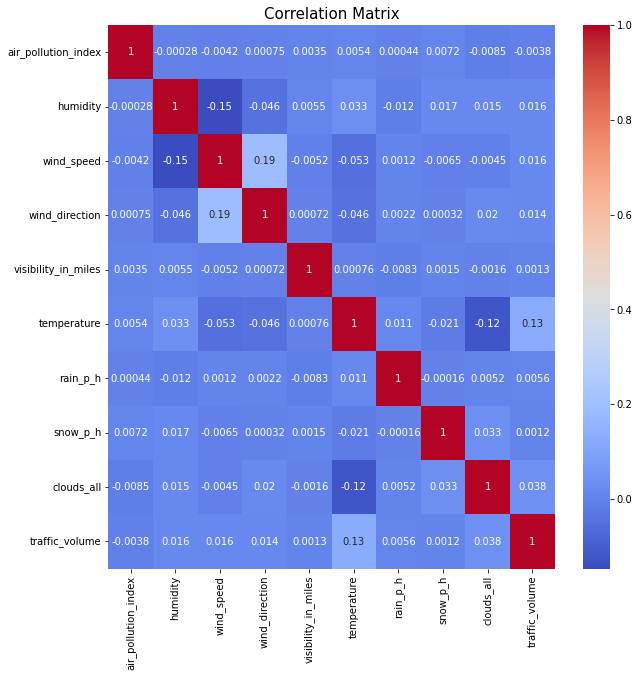

In [104]:
import seaborn as sns
plt.figure(figsize=(10,10))
plt.title('Correlation Matrix',fontsize=15)

sns.heatmap(train_set.corr(), annot=True, cmap='coolwarm')

***Which features are more correlated to the price?***

**Prepare Train Data**

<a id="ch5"></a>
## Feature engineering
<hr/>

We want to engineer the date feature to make a year,month,day and hour column. The feature date is as a string. With pd.to_datetime we can convert an argument to datetime.

In [105]:
train_set['date_time'] = pd.to_datetime(train_set.date_time)

In [106]:
train_set['year'] = train_set.date_time.dt.year
train_set['month'] = train_set.date_time.dt.month
train_set['day'] = train_set.date_time.dt.day
train_set['hour'] = train_set.date_time.dt.hour

In [107]:
train_copy = train_set.drop(['date_time'], axis=1)
train_copy.head()

,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume,year,month,day,hour
0,None,121,89,2,329,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545,2012,10,2,9
1,None,178,67,3,330,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516,2012,10,2,10
2,None,113,66,3,329,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767,2012,10,2,11
3,None,20,66,3,329,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026,2012,10,2,12
4,None,281,65,3,329,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918,2012,10,2,13


**One-hot-encoding**

In [108]:
# train_onehot = train_copy.copy()

In [109]:
train_onehot = pd.get_dummies(train_copy, columns=['is_holiday', 'weather_type', 'weather_description'], 
                              prefix=['is_holiday', 'weather_type', 'weather_desc'])

In [110]:
train_onehot=train_onehot.drop(['weather_type_Squall','weather_desc_SQUALLS','weather_desc_freezing rain','weather_desc_light rain and snow','weather_desc_shower snow','weather_desc_thunderstorm with drizzle','weather_desc_very heavy rain'],axis=1)

In [111]:
train_onehot = train_onehot.astype(float)
train_onehot.head()

,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,temperature,rain_p_h,snow_p_h,clouds_all,traffic_volume,...,weather_desc_shower drizzle,weather_desc_sky is clear,weather_desc_sleet,weather_desc_smoke,weather_desc_snow,weather_desc_thunderstorm,weather_desc_thunderstorm with heavy rain,weather_desc_thunderstorm with light drizzle,weather_desc_thunderstorm with light rain,weather_desc_thunderstorm with rain
0,121.0,89.0,2.0,329.0,1.0,288.28,0.0,0.0,40.0,5545.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,178.0,67.0,3.0,330.0,1.0,289.36,0.0,0.0,75.0,4516.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,113.0,66.0,3.0,329.0,2.0,289.58,0.0,0.0,90.0,4767.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,20.0,66.0,3.0,329.0,5.0,290.13,0.0,0.0,90.0,5026.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,281.0,65.0,3.0,329.0,7.0,291.14,0.0,0.0,75.0,4918.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Preparing the Test data**

In [112]:
test_set.head()

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description
0,2017-05-18 00:00:00,None,73,63,1,27,4,4,285.15,0.0,0,90,Rain,moderate rain
1,2017-05-18 00:00:00,None,251,63,1,27,4,4,285.15,0.0,0,90,Mist,mist
2,2017-05-18 00:00:00,None,75,56,1,0,1,1,285.15,0.0,0,90,Drizzle,light intensity drizzle
3,2017-05-18 01:00:00,None,98,56,1,351,2,2,284.79,0.0,0,90,Rain,heavy intensity rain
4,2017-05-18 01:00:00,None,283,56,1,351,1,1,284.79,0.0,0,90,Mist,mist


In [113]:
test_set.shape

(14454, 14)

In [114]:
test_set.columns

Index(['date_time', 'is_holiday', 'air_pollution_index', 'humidity',
       'wind_speed', 'wind_direction', 'visibility_in_miles', 'dew_point',
       'temperature', 'rain_p_h', 'snow_p_h', 'clouds_all', 'weather_type',
       'weather_description'],
      dtype='object')

In [115]:
test_set=test_set.drop(['dew_point'],axis=1)

In [116]:
test_set['date_time'] = pd.to_datetime(test_set.date_time)

In [117]:
test_set['year'] = test_set.date_time.dt.year
test_set['month'] = test_set.date_time.dt.month
test_set['day'] = test_set.date_time.dt.day
test_set['hour'] = test_set.date_time.dt.hour

In [118]:
test_copy = test_set.drop(['date_time'], axis=1)

In [119]:
# test_onehot = test_copy.copy()
test_onehot = pd.get_dummies(test_copy, columns=['is_holiday', 'weather_type', 'weather_description'], 
                              prefix=['is_holiday', 'weather_type', 'weather_desc'])

In [120]:
test_onehot.head()

,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,temperature,rain_p_h,snow_p_h,clouds_all,year,...,weather_desc_shower drizzle,weather_desc_sky is clear,weather_desc_sleet,weather_desc_smoke,weather_desc_snow,weather_desc_thunderstorm,weather_desc_thunderstorm with heavy rain,weather_desc_thunderstorm with light drizzle,weather_desc_thunderstorm with light rain,weather_desc_thunderstorm with rain
0,73,63,1,27,4,285.15,0.0,0,90,2017,...,0,0,0,0,0,0,0,0,0,0
1,251,63,1,27,4,285.15,0.0,0,90,2017,...,0,0,0,0,0,0,0,0,0,0
2,75,56,1,0,1,285.15,0.0,0,90,2017,...,0,0,0,0,0,0,0,0,0,0
3,98,56,1,351,2,284.79,0.0,0,90,2017,...,0,0,0,0,0,0,0,0,0,0
4,283,56,1,351,1,284.79,0.0,0,90,2017,...,0,0,0,0,0,0,0,0,0,0


In [121]:
print(len(train_onehot.columns))
print(len(train_onehot))

68
33750


In [122]:
print(len(test_onehot.columns))
print(len(test_onehot))

67
14454


In [125]:
test_onehot = test_onehot.astype(float)
test_onehot.head()

,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,temperature,rain_p_h,snow_p_h,clouds_all,year,...,weather_desc_shower drizzle,weather_desc_sky is clear,weather_desc_sleet,weather_desc_smoke,weather_desc_snow,weather_desc_thunderstorm,weather_desc_thunderstorm with heavy rain,weather_desc_thunderstorm with light drizzle,weather_desc_thunderstorm with light rain,weather_desc_thunderstorm with rain
0,73.0,63.0,1.0,27.0,4.0,285.15,0.0,0.0,90.0,2017.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,251.0,63.0,1.0,27.0,4.0,285.15,0.0,0.0,90.0,2017.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,75.0,56.0,1.0,0.0,1.0,285.15,0.0,0.0,90.0,2017.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,98.0,56.0,1.0,351.0,2.0,284.79,0.0,0.0,90.0,2017.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,283.0,56.0,1.0,351.0,1.0,284.79,0.0,0.0,90.0,2017.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Train and Test data**

<a id="ch6"></a>
## Scaling and train test split
<hr/>
Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a mean squared error regression problem. We are also performing a category of machine learning which is called supervised learning as we are training our model with a given dataset.

## Here we split the data into train data, test data 

In [126]:
y = train_onehot['traffic_volume']
x = train_onehot.drop(['traffic_volume'], axis=1)

### Normalizing / scaling the data
We scale the feature data. To prevent data leakage from the test set, we only fit our scaler to the training set.

In [127]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x=scaler.fit_transform(x)
# y=scaler.fit_transform(y.values.reshape(-1,1))

In [128]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=2323)

In [129]:
x_train


array([[0.23183391, 0.44827586, 0.3125    , ..., 0.        , 0.        ,
        0.        ],
       [0.4567474 , 0.14942529, 0.1875    , ..., 0.        , 0.        ,
        0.        ],
       [0.95847751, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.16955017, 0.35632184, 0.1875    , ..., 0.        , 0.        ,
        0.        ],
       [0.77508651, 0.44827586, 0.25      , ..., 0.        , 0.        ,
        0.        ],
       [0.38408304, 0.74712644, 0.25      , ..., 0.        , 0.        ,
        0.        ]])

In [130]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(23625, 67)
(10125, 67)
(23625,)
(10125,)


In [131]:
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

<a id="ch7"></a>
## Creating a model
***
We estimate the number of neurons (units) from our features. Ex: x_train_set.shape (23625, 67). The optimizer is asking how you want to perform this gradient descent. In this case we are using the Adam optimizer and the mean square error loss function.

In [132]:
model=Sequential()
model.add(Dense(67,activation='relu',input_dim=67))
model.add(Dense(67,activation='relu'))
model.add(Dense(1,activation='linear'))

In [133]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 67)                4556      
                                                                 
 dense_10 (Dense)            (None, 67)                4556      
                                                                 
 dense_11 (Dense)            (None, 1)                 68        
                                                                 
Total params: 9,180
Trainable params: 9,180
Non-trainable params: 0
_________________________________________________________________


In [154]:
model.compile(optimizer='adam',loss='mean_squared_error')

<a id="ch8"></a>
## Training the model


In [135]:
history=model.fit(x_train,y_train,epochs=50,validation_split=0.2)

Epoch 1/50
591/591 [==============================] - 2s 2ms/step - loss: 7309534.5000 - val_loss: 3807667.2500
Epoch 2/50
591/591 [==============================] - 1s 2ms/step - loss: 3732841.7500 - val_loss: 3691408.5000
Epoch 3/50
591/591 [==============================] - 1s 2ms/step - loss: 3601598.7500 - val_loss: 3582657.2500
Epoch 4/50
591/591 [==============================] - 2s 3ms/step - loss: 3477714.5000 - val_loss: 3490426.0000
Epoch 5/50
591/591 [==============================] - 1s 2ms/step - loss: 3372073.0000 - val_loss: 3423738.2500
Epoch 6/50
591/591 [==============================] - 1s 2ms/step - loss: 3289867.2500 - val_loss: 3368301.2500
Epoch 7/50
591/591 [==============================] - 1s 2ms/step - loss: 3222777.0000 - val_loss: 3314557.5000
Epoch 8/50
591/591 [==============================] - 1s 2ms/step - loss: 3154447.2500 - val_loss: 3256727.7500
Epoch 9/50
591/591 [==============================] - 1s 2ms/step - loss: 3081671.5000 - val_loss: 31861

In [136]:
train_pred = model.predict(x_train)
test_pred = model.predict(x_test)

317/317 [==============================] - 0s 1ms/step


<a id="ch9"></a>
## Evaluation on test data
---
### Regression Evaluation Metrics

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.





In [137]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_train, train_pred)
mae = mean_absolute_error(y_train, train_pred)
rmse=np.sqrt(mean_squared_error(y_train, train_pred))
r2_score=r2_score(y_train, train_pred)
print("Train MSE: ", mse)
print("Train MAE: ", mae)
print("Train RMSE: ", rmse)
print("Train R2_score: ", r2_score)


Train MSE:  962737.455701303
Train MAE:  701.0267266405486
Train RMSE:  981.191854685567
Train R2_score:  0.7567269298700922


In [138]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Assuming `y_test` and `test_pred` are defined
mse = mean_squared_error(y_test, test_pred)
mae = mean_absolute_error(y_test, test_pred)
rmse = np.sqrt(mean_squared_error(y_test, test_pred))
r2 = r2_score(y_test, test_pred)

print("MSE: ", mse)
print("MAE: ", mae)
print("RMSE: ", rmse)
print("R2 Score: ", r2)


MSE:  1010743.1596492871
MAE:  713.0035206121751
RMSE:  1005.3572298687104
R2 Score:  0.7463825914964497


**parameter tunning**

In [139]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression

In [155]:

param_grid = {'hidden_layer_sizes': [(64,),(128)],
              'activation': ['relu', 'tanh'],
              'learning_rate_init': [0.001, 0.01, 0.1],
              'max_iter': [100, 300, 500]}
reg = MLPRegressor(random_state=0)
grid_search = GridSearchCV(reg, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train.ravel())
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'activation': 'tanh', 'hidden_layer_sizes': 128, 'learning_rate_init': 0.01, 'max_iter': 500}


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [162]:
besthp=MLPRegressor(hidden_layer_sizes=(128,), activation='tanh', learning_rate_init=0.01, max_iter=500, random_state=0)

In [157]:
besthp.fit(x_train,y_train.ravel())

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(activation='tanh', hidden_layer_sizes=(128,),
             learning_rate_init=0.01, max_iter=500, random_state=0)

In [158]:
train_pred_bhp = besthp.predict(x_train)
test_pred_bhp = besthp.predict(x_test)

In [159]:
mse = mean_squared_error(y_train, train_pred_bhp)
mae = mean_absolute_error(y_train, train_pred_bhp)
rmse=np.sqrt(mean_squared_error(y_train, train_pred_bhp))
r2_score=r2_score(y_train, train_pred_bhp)
print("Train MSE: ", mse)
print("Train MAE: ", mae)
print("Train RMSE: ", rmse)
print("Train R2_score: ", r2_score)

Train MSE:  802270.2378144914
Train MAE:  616.6524135649412
Train RMSE:  895.6953934315457
Train R2_score:  0.797275214887312


In [160]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, test_pred_bhp)
mae = mean_absolute_error(y_test, test_pred_bhp)
rmse = np.sqrt(mean_squared_error(y_test, test_pred_bhp))
r2 = r2_score(y_test, test_pred_bhp)

print("MSE: ", mse)
print("MAE: ", mae)
print("RMSE: ", rmse)
print("R2 Score: ", r2)

MSE:  937881.6276377104
MAE:  661.6261551113637
RMSE:  968.4428881651775
R2 Score:  0.764665132171557


***Evaluation on Test Data***

In [146]:
test_onehot.head()

,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,temperature,rain_p_h,snow_p_h,clouds_all,year,...,weather_desc_shower drizzle,weather_desc_sky is clear,weather_desc_sleet,weather_desc_smoke,weather_desc_snow,weather_desc_thunderstorm,weather_desc_thunderstorm with heavy rain,weather_desc_thunderstorm with light drizzle,weather_desc_thunderstorm with light rain,weather_desc_thunderstorm with rain
0,73.0,63.0,1.0,27.0,4.0,285.15,0.0,0.0,90.0,2017.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,251.0,63.0,1.0,27.0,4.0,285.15,0.0,0.0,90.0,2017.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,75.0,56.0,1.0,0.0,1.0,285.15,0.0,0.0,90.0,2017.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,98.0,56.0,1.0,351.0,2.0,284.79,0.0,0.0,90.0,2017.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,283.0,56.0,1.0,351.0,1.0,284.79,0.0,0.0,90.0,2017.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [147]:
test_onehot.shape

(14454, 67)

### Normalizing / scaling the test data
We scale the feature data. To prevent data leakage from the test set, we only fit our scaler to the training set.

In [148]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
pred_test=scaler.fit_transform(test_onehot)

**Predicting the Traffic volume by using the best hyperparameters**

In [161]:
test_predictions=besthp.predict(pred_test)

In [170]:
test_predictions

array([ 377.60401899,  603.92536804,  390.11017579, ..., 2158.22087513,
       1644.41442332, 1393.19739908])

In [171]:
pd.DataFrame(test_predictions)

,0
0,377.604019
1,603.925368
2,390.110176
3,-15.000346
4,482.844068
...,...
14449,2949.639861
14450,2524.740810
14451,2158.220875
14452,1644.414423
